# Bacman1 Silica Saturation Index Simulator

In [83]:
import math

## Define a Class for Production Well

The p_well class will define a production well with its well name, operating wellhead pressure, silica (td), separator pressure and bore output curve functions

In [84]:
class p_well:
    def __init__(self, name, opwhp, sio2_td, svp, fx):
        self.name = name
        self.opwhp = opwhp
        self.sio2_td = sio2_td
        self.svp = svp
        self.enthalpy = fx(opwhp)[0]
        self.mass_flow = fx(opwhp)[1]
        self.water_flow = fx(opwhp)[2]
        self.t_svp = t_sat(svp) #calculate saturated temp at separator station
        self.sio2_sep = sio2_td/(self.water_flow/self.mass_flow)    #calculate sio2 conc 
                                            #at separator pressure [sio2(td)/Water Fraction]        
        self.pw_ssi = self.sio2_sep/sio2_theo(self.t_svp)   #calculate SSI of production well at separator pressure

## Utility functions for SSI calculation

In [85]:
def sio2_theo(temp):
    """
    This function will calculate the theoretical SiO2 concentration 
    at the given brine line temperature in degree celcius 
    """
    y = ((-731/(temp+273.15))+4.52)
    sio2_theo = math.pow(10,y)
    return sio2_theo

def ssi_p(p_sat,sio2_meas):
    temp = t_sat(p_sat)
    sio2_calc = sio2_theo(temp)
    ssi = sio2_meas / sio2_calc
    return ssi

def t_sat(p_sat):
    """
    This function will calculate the saturation temperature (deg C) from a
    given saturated pressure (Mpaa) megapascal absolute
    """
    t_sat = 1 / (0.0022078 - 0.00046828 * math.log10(p_sat) / math.log10(10) - 0.0000099586 * \
        (math.log10(p_sat) / math.log10(10))* (math.log10(p_sat) / math.log10(10))) - 273.15
    return t_sat

## Bore Output Curve function for each production well

In [86]:
def PAL2D_fx(WHP):
    hf = 716.4
    hfg = 2050.8
    H =-2.30 * WHP + 1281.46
    x=(H-hf)/hfg
    MF = 35.52 + 7.28 * WHP + 4.74 * WHP * WHP - 14.79 * WHP * WHP * WHP
    WF = MF*(1-x)    
    return [H,MF,WF]

def PAL3D_fx(WHP):
    hf = 738.8
    hfg = 2034.5
    H =-2.30 * WHP + 1281.46
    x=(H-hf)/hfg
    MF = 35.52 + 7.28 * WHP + 4.74 * WHP * WHP - 14.79 * WHP * WHP * WHP
    WF = MF*(1-x)    
    return [H,MF,WF]
    
def PAL4D_fx(WHP):
    hf = 738.8
    hfg = 2034.5
    H =-102.4 * WHP + 1474.39
    x=(H-hf)/hfg
    MF = 25.48 + 16.84 * WHP - 18.82 * WHP * WHP
    WF = MF*(1-x)    
    return [H,MF,WF]

def PAL8D_fx(WHP):
    hf = 738.8
    hfg = 2034.5
    H = 1420.08 + 271.35 * WHP - 270.78 *WHP*WHP + 121.27 * WHP*WHP*WHP - 22.37 *WHP*WHP*WHP*WHP
    x=(H-hf)/hfg
    MF = 48.93 + 37.32 * WHP - 16.85 * WHP * WHP
    WF = MF*(1-x)    
    return [H,MF,WF]

def PAL9D_fx(WHP):
    hf = 738.8
    hfg = 2034.5
    H = -8.64 * WHP + 1355.15
    x=(H-hf)/hfg
    MF = 40.36 + 18.85 * WHP - 19.00 * WHP * WHP
    WF = MF*(1-x)    
    return [H,MF,WF]

def PAL10D_fx(WHP):
    hf = 738.8
    hfg = 2034.5
    H = 121.70 * WHP + 1864.32
    x=(H-hf)/hfg
    MF =  -8.75 * WHP + 43.44
    WF = MF*(1-x)    
    return [H,MF,WF]

def PAL11D_fx(WHP):
    hf = 738.8
    hfg = 2034.5
    H = 14.43 * WHP + 2481
    x=(H-hf)/hfg
    MF =  9.35 + 11.85 * WHP - 10.86 * WHP * WHP
    WF = MF*(1-x)    
    return [H,MF,WF]

def PAL12D_fx(WHP):
    hf = 738.8
    hfg = 2034.5
    H = 1292.8 - 304.05 * WHP + 301.84 * WHP * WHP
    x=(H-hf)/hfg
    MF =  24.39 - 8.21 * WHP + 16.38 * WHP * WHP - 11.21 * WHP * WHP * WHP
    WF = MF*(1-x)    
    return [H,MF,WF]

def PAL13D_fx(WHP):
    hf = 738.8
    hfg = 2034.5
    H = 74.72 * WHP + 1245.94
    x=(H-hf)/hfg
    MF =  34.55 + 40.33 * WHP - 24.68 * WHP * WHP
    WF = MF *(1-x)    
    return [H,MF,WF]

def PAL14D_f x(WHP):
    hf = 738.8
    hfg = 2034.5
    H = -12.17 * WHP + 1346.78
    x=(H-hf)/hfg
    MF =  35.35 + 48.67 * WHP - 35.78 * WHP * WHP
    WF = MF*(1-x)    
    return [H,MF,WF]

def PAL15D_fx(WHP):
    hf = 738.8
    hfg = 2034.5
    H = -32.86 * WHP + 1355.61
    x=(H-hf)/hfg
    MF =  41.96 + 19.86 * WHP - 10.58 * WHP * WHP
    WF = MF*(1-x)    
    return [H,MF,WF]

def PAL18D_fx(WHP):
    hf = 738.8
    hfg = 2034.5
    H = 3.37 * WHP + 1352
    x=(H-hf)/hfg
    MF =  25.95 - 25.56 * WHP + 44.46 * WHP * WHP - 25.26 * WHP *WHP * WHP
    WF = MF*(1-x)    
    return [H,MF,WF]

def PAL19_fx(WHP):
    hf = 738.8
    hfg = 2034.5
    H = 1569.78 - 129.69 * WHP + 114.83 * WHP * WHP - 60.74 * WHP * WHP * WHP
    x=(H-hf)/hfg
    MF =  55.49 + 11.24 * WHP + 2.97 * WHP * WHP - 9.03 * WHP * WHP * WHP
    WF = MF*(1-x)    
    return [H,MF,WF]

def PAL20D_fx(WHP):
    hf = 738.8
    hfg = 2034.5
    H = -25.14 * WHP + 1808.22
    x=(H-hf)/hfg
    MF =  40.42 + 17.96 * WHP - 12.78 * WHP * WHP + 0.92 * WHP * WHP * WHP
    WF = MF*(1-x)    
    return [H,MF,WF]

def PAL21_fx(WHP):
    hf = 738.8
    hfg = 2034.5
    H = -2.84 * WHP + 1169.67
    x=(H-hf)/hfg
    MF =  18.76 + 27.39 * WHP - 28.93 * WHP * WHP
    WF = MF*(1-x)    
    return [H,MF,WF]

def PAL22D_fx(WHP):
    hf = 738.8
    hfg = 2034.5
    H =  -153.59 * WHP + 1243.42
    x=(H-hf)/hfg
    MF =  114.33 - 688.68 * WHP + 1920.33 * WHP * WHP - 2600.92 * WHP * WHP * WHP + 1716.36 * WHP * WHP * \
        WHP * WHP - 444.96 * WHP * WHP * WHP * WHP * WHP
    WF = MF*(1-x)    
    return [H,MF,WF]

def PAL23D_fx(WHP):
    hf = 738.8
    hfg = 2034.5
    H = -1.46 * WHP + 1202
    x=(H-hf)/hfg
    MF =  14.87 + 69.71 * WHP - 93.59 * WHP * WHP + 53.18 * WHP * WHP * WHP - 12.04 * WHP * WHP * WHP * WHP
    WF = MF*(1-x)    
    return [H,MF,WF]

def PAL24D_fx(WHP):
    hf = 716.4
    hfg = 2050.8
    H = -8.17 * WHP + 1397.57
    x=(H-hf)/hfg
    MF =  35.41 + 21.09 * WHP - 23.50 * WHP * WHP
    WF = MF*(1-x)    
    return [H,MF,WF]

def PAL25D_fx(WHP):
    hf = 738.8
    hfg = 2034.5
    H = -25.03 * WHP + 1189.37
    x=(H-hf)/hfg
    MF =  3.43 + 83.28 * WHP - 58.30 * WHP * WHP
    WF = MF*(1-x)    
    return [H,MF,WF]

def PAL26D_fx(WHP):
    hf = 738.8
    hfg = 2034.5
    H = 1315.39 - 8.01 * WHP - 7.21 * WHP * WHP
    x=(H-hf)/hfg
    MF =  45.42 + 3.51 * WHP - 4.8 * WHP * WHP + 1.5 * WHP * WHP * WHP - 0.2 * WHP * WHP * WHP * WHP
    WF = MF*(1-x)    
    return [H,MF,WF]

def PAL27D_fx(WHP):
    hf = 738.8
    hfg = 2034.5
    H = -109.33 * WHP + 1742.49
    x=(H-hf)/hfg
    MF = 40.37 - 3.85 * WHP + 7.27 * WHP * WHP - 3.95 * WHP * WHP * WHP
    WF = MF*(1-x)    
    return [H,MF,WF]

def PAL28D_fx(WHP):
    hf = 716.4
    hfg = 2050.8
    H = 1197.63 + 169.54 * WHP - 148.59 * WHP * WHP
    x=(H-hf)/hfg
    MF = 40.37 - 3.85 * WHP + 7.27 * WHP * WHP - 3.95 * WHP * WHP * WHP
    WF = MF*(1-x)    
    return [H,MF,WF]

def PAL30D_fx(WHP):
    hf = 738.8
    hfg = 2034.5
    H = -8.16 * WHP + 1201.51
    x=(H-hf)/hfg
    MF = 29.2 + 126.62 * WHP - 63.35 * WHP * WHP
    WF = MF*(1-x)    
    return [H,MF,WF]


## Define Production Wells

Create instances of class p_well with the format:
p_well("Well Name", Operating WHP, SiO2(TD), Separator Pressure, BOC fn)

In [87]:
PAL2D = p_well('PAL2D', 0.88, 338.87, 0.78, PAL2D_fx)
PAL3D = p_well('PAL3D', 0.87, 524.56, 0.88, PAL3D_fx)
PAL4D = p_well('PAL4D', 0.97, 404.74, 0.88, PAL4D_fx)
PAL8D = p_well('PAL8D', 1.03, 420.08, 0.88, PAL8D_fx)
PAL9D = p_well('PAL9D', 0.93, 497.76, 0.88, PAL9D_fx)
PAL10D = p_well('PAL10D', 0.97, 273.06, 0.88, PAL10D_fx)
PAL11D = p_well('PAL11D', 0.87, 57.12, 0.88, PAL11D_fx)
PAL12D = p_well('PAL12D', 1.04, 517.26, 0.88, PAL12D_fx)
PAL13D = p_well('PAL13D', 0.95, 480.08, 0.88, PAL13D_fx)
PAL14D = p_well('PAL14D', 1.00, 520.22, 0.88, PAL14D_fx)
PAL15D = p_well('PAL15D', 0.98, 416.02, 0.88, PAL15D_fx)
PAL18D = p_well('PAL18D', 0.87, 427.00, 0.88, PAL18D_fx)
PAL19 = p_well('PAL19', 0.98, 492.16, 0.88, PAL19_fx)
PAL20D = p_well('PAL20D', 1.03, 415.26, 0.88, PAL20D_fx)
PAL21 = p_well('PAL21', 0.92, 594.72, 0.88, PAL21_fx)
PAL22D = p_well('PAL22D', 1.02, 478.04, 0.88, PAL22D_fx)
PAL23D = p_well('PAL23D', 0.84, 568.62, 0.88, PAL23D_fx)
PAL24D = p_well('PAL24D', 0.93, 541.12, 0.78, PAL24D_fx)
PAL25D = p_well('PAL25D', 0.92, 422.4, 0.88, PAL25D_fx)
PAL26D = p_well('PAL26D', 1.08, 228.48, 0.88, PAL26D_fx)
PAL27D = p_well('PAL27D', 1.16, 530.40, 0.88, PAL27D_fx)
PAL28D = p_well('PAL28D', 0.85, 492.48, 0.78, PAL28D_fx)
PAL30D = p_well('PAL30D', 1.14, 585.97, 0.88, PAL30D_fx)

### Define function for branchline

In [139]:
def svp_header(well_list, vessel_name):
    """"
    Calculate the water flow and SSI at SVP header given the list of production wells
    that suppies two-phase flow to the separator
    """
    total_wf = 0     #initialize total_wf at zero
    for wells in well_list:
        total_wf = total_wf + wells.water_flow
    sio2_head = 0    #initialize sio2 conc at zero; weighted average of sio2 for each well
    for wells in well_list:
        water_fraction = wells.water_flow / total_wf
        sio2_head = sio2_head + wells.sio2_sep * water_fraction
    ssi_head = ssi_p(0.88,sio2_head)
    return [vessel_name, round(ssi_head,2), round(total_wf,2), round(sio2_head,2)]

def ril_header(well_list, vessel_name):
    """"
    Calculate the water flow and SSI at main reinjection line given the list of SVP header
    that suppies brine to the main RI line
    """
    total_wf = 0     #initialize total_wf at zero
    for wells in well_list:
        total_wf = total_wf + wells[2]
    sio2_head = 0    #initialize sio2 conc at zero; weighted average of sio2 for each well
    for wells in well_list:
        water_fraction = wells[2]/ total_wf
        sio2_head = sio2_head + wells[3] * water_fraction
    ssi_head = ssi_p(0.88,sio2_head)
    return [vessel_name, round(ssi_head,2), round(total_wf,2), round(sio2_head,2)]


## List of Wells per PAD, Separator Vessel, RI line

In [89]:
#List of all production wells
all_wells = [PAL2D, PAL3D, PAL4D, PAL8D, PAL9D, PAL10D, PAL11D, PAL12D, PAL13D, PAL14D, PAL15D, PAL18D, PAL19, \
            PAL20D, PAL21, PAL22D, PAL23D, PAL24D, PAL25D, PAL26D, PAL27D, PAL28D, PAL30D]
pad_e = [PAL8D, PAL11D, PAL12D, PAL14D, PAL18D, PAL19, PAL20D, PAL23D]
pad_h = [PAL3D, PAL4D, PAL9D, PAL10D, PAL13D, PAL15D, PAL21, PAL22D, PAL25D]
pad_f = [PAL26D, PAL27D, PAL30D]
pad_c = [PAL2D, PAL24D, PAL28D]

#list of wells by separator vessel
SV301_302 = [PAL8D, PAL20D]
SV303_304 = [PAL12D, PAL14D, PAL23D]
SV305_306 = [PAL11D, PAL18D, PAL19]
SV401_402 = [PAL13D, PAL15D, PAL21, PAL22D, PAL25D]
SV403_404 = [PAL3D, PAL4D, PAL9D, PAL10D]
SV405 = [PAL26D, PAL27D, PAL30D]
SV508 = [PAL2D, PAL24D, PAL28D]

# Calculate SSI

In [243]:
#store ssi of each production well; additional parameters can be included in well_data 
all_wells_list = []
for wells in all_wells:
    well_data = [wells.name,round(wells.pw_ssi,2), round(wells.water_flow,2), round(wells.sio2_sep,2) ]
    all_wells_list.append(well_data)
#for wells in all_wells_list:
    #print wells
#print PAL27D.sio2_td, PAL27D.sio2_sep, PAL27D.water_flow, PAL27D.water_flow/PAL27D.mass_flow
#print PAL30D.sio2_td, PAL30D.sio2_sep, PAL30D.water_flow, PAL30D.water_flow/PAL30D.mass_flow

#calculate SSI, sio2_sep, water_flow after separator vessel
SV301_302calc = svp_header(SV301_302, "SV301_302")
SV303_304calc = svp_header(SV303_304, "SV303_304")
SV305_306calc = svp_header(SV305_306, "SV305_306")
SV401_402calc = svp_header(SV401_402, "SV401_402")
SV403_404calc = svp_header(SV403_404, "SV403_404")
SV405calc = svp_header(SV405, "SV405")
SV508calc = svp_header(SV508, "SV508")     #PAD-C

#make list of separator vessel
SV_ALL = [SV301_302calc, SV303_304calc, SV305_306calc, SV401_402calc, SV403_404calc, SV405calc, SV508calc]

#make list of SSI at Separator Vessel Header; for plotting
SV_ALL_SSI = []
for sv in SV_ALL:
    SV_ALL_SSI.append(sv[1])

#for sv in SV_ALL:
    #print sv

#assume 722 = Pad E and 723 = Pad H and F
RIL722 = [SV301_302calc, SV303_304calc, SV305_306calc]
RIL723 = [SV401_402calc, SV403_404calc, SV405calc]
#RIL 722 with PAD-C
RIL722_C = [SV301_302calc, SV303_304calc, SV305_306calc, SV508calc]

#calculate SSI at RIL722 and 723
RIL722calc = ril_header(RIL722, "RIL722")
RIL723calc = ril_header(RIL723, "RIL723")
RIL722_C_calc = ril_header(RIL722_C, "RIL722_C")
print RIL722
#print RIL723calc
#print RIL722_C_calc

#RIL 722 and 723 cross-over header (uniform SSI)
RIL_HEAD = [RIL722_C, RIL723]
RIL_HEADa = []
for sv in RIL722:
    RIL_HEADa.append(sv)
for sv in RIL723:
    RIL_HEADa.append(sv)


RIL_HEADcalc = ril_header(RIL_HEADa, "RIL_HEADER")
RIL_SSI = [RIL722calc, RIL723calc, RIL722_C_calc, RIL_HEADcalc]
for sv in RIL_SSI:
    SV_ALL_SSI.append(sv[1])
print RIL_HEADcalc
print RIL_HEADa
print SV_ALL_SSI

[['SV301_302', 0.96, 65.41, 740.71], ['SV303_304', 0.95, 74.7, 731.63], ['SV305_306', 0.94, 54.24, 727.47]]
['RIL_HEADER', 0.89, 531.78, 684.3]
[['SV301_302', 0.96, 65.41, 740.71], ['SV303_304', 0.95, 74.7, 731.63], ['SV305_306', 0.94, 54.24, 727.47], ['SV401_402', 0.8, 125.83, 619.28], ['SV403_404', 0.89, 85.43, 686.69], ['SV405', 0.87, 126.17, 671.7]]
[0.96, 0.95, 0.94, 0.8, 0.89, 0.87, 0.83, 0.95, 0.85, 0.92, 0.89]


# Plot Results

In [251]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot_pad_EandC():
    pad_eandc = [PAL11D, PAL18D, PAL19, PAL8D, PAL20D, PAL12D, PAL14D, PAL23D, PAL2D, PAL24D, PAL28D]
    pad_eandc_ssi = []
    for wells in pad_eandc:
        pad_eandc_ssi.append(round(wells.pw_ssi,2))
    x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
    y = pad_eandc_ssi
    
    a = [0, 12]
    z = [1, 1]
    labels = ['PAL11D', 'PAL18D', 'PAL19', 'PAL8D', 'PAL20D', 'PAL12D', 'PAL14D', 'PAL23D', 'PAL2D', 'PAL24D', 'PAL28D']
    
    plt.plot(x, y, 'bo')
    plt.plot(a, z, 'r--')
    # You can specify a rotation for the tick labels in degrees or with keywords.
    plt.xticks(x, labels, rotation='vertical')
    # Pad margins so that markers don't get clipped by the axes
    plt.margins(0.2)
    # Tweak spacing to prevent clipping of tick-labels
    plt.subplots_adjust(bottom=0.15)
    plt.ylim(0.4, 1.6)
    plt.xlim(0, 12)
    plt.grid(True)
    plt.title(r'PAD-E and PAD-C')
    plt.show()

In [253]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot_pad_HandF():
    pad_handf = [PAL15D, PAL13D, PAL21, PAL22D, PAL25D, PAL10D, PAL9D, PAL3D, PAL4D, PAL26D, PAL27D, PAL30D]
    pad_handf_ssi = []
    for wells in pad_handf:
        pad_handf_ssi.append(round(wells.pw_ssi,2))
    x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
    y = pad_handf_ssi

    a = [0, 13]
    z = [1, 1]
    labels = ['PAL15D', 'PAL13D', 'PAL21', 'PAL22D', 'PAL25D', 'PAL10D', 'PAL9D', \
              'PAL3D', 'PAL4D', 'PAL26D', 'PAL27D', 'PAL30D']
    plt.plot(x, y, 'bo')
    plt.plot(a, z, 'r--')
    # You can specify a rotation for the tick labels in degrees or with keywords.
    plt.xticks(x, labels, rotation='vertical')
    # Pad margins so that markers don't get clipped by the axes
    plt.margins(0.2)
    # Tweak spacing to prevent clipping of tick-labels
    plt.subplots_adjust(bottom=0.15)
    plt.ylim(0.2, 1.6)
    plt.xlim(0, 13)
    plt.grid(True)
    plt.title(r'PAD-H and PAD-F')
    plt.show()

In [255]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot_ri_lines():
    x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
    y = SV_ALL_SSI

    a = [0, 12]
    z = [1, 1]
    labels = ['SV301_302', 'SV303_304', 'SV305_306', 'SV401_402', 'SV403_404', 'SV405', 'SV508', 'RIL722', \
              'RIL723', 'RIL722+PAD C', 'RIL HEADER']

    plt.plot(x, y, 'bo')
    plt.plot(a, z, 'r--')
    # You can specify a rotation for the tick labels in degrees or with keywords.
    plt.xticks(x, labels, rotation='vertical')
    # Pad margins so that markers don't get clipped by the axes
    plt.margins(0.2)
    # Tweak spacing to prevent clipping of tick-labels
    plt.subplots_adjust(bottom=0.15)
    plt.ylim(0.4, 1.4)
    plt.xlim(0, 12)
    plt.grid(True)
    plt.title(r'SEPARATOR VESSEL')
    plt.show()

# Plot SSI of each production well at separator vessel pressure

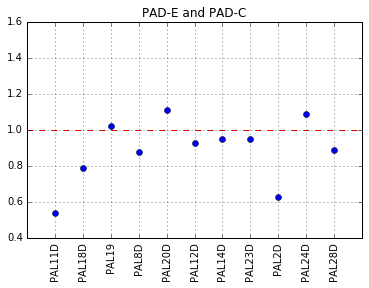

In [252]:
plot_pad_EandC()

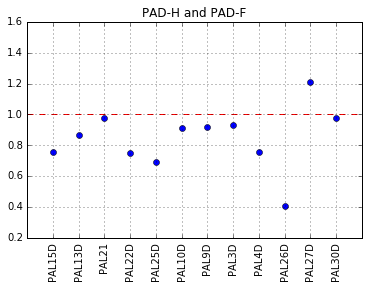

In [254]:
plot_pad_HandF()

# Plot SSI at Reinjection Lines

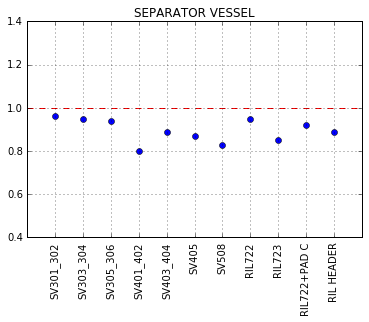

In [260]:
plot_ri_lines()